In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image, ImageDraw
import pandas as pd
from matplotlib import cm
import scipy as sp
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.segmentation import chan_vese
from skimage.measure import find_contours

import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

Current directory: /home/jovyan/Thesis/utils


/tmp/ipykernel_210/310745627.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  X = imageio.imread(BF)
/tmp/ipykernel_210/310745627.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  B = imageio.imread(Brightfield)
/tmp/ipykernel_210/310745627.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  X2 = imageio.imread(BF2)


(684, 428, 3)
(684, 428, 3)
(20, 684, 856)
Shape of the cropped image: (428, 684)


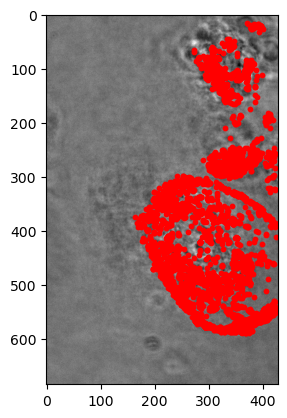

In [3]:

# Set directory
current_directory = os.getcwd()
print("Current directory:", current_directory)
# os.chdir(r'./pos_0')
BaseFolder = '../Data/pos_0/'
# Set name of brightfield image
BF = BaseFolder + "MDA-MB-468_4-colour_EGF_B10_1nM_posXY0_channels_t0_posZ0_colour0_locImage.tif"
BF2 = BaseFolder + "MDA-MB-468_4-colour_EGF_B10_1nM_posXY0_channels_t0_posZ0_colour1_thumbnail.png"
BF3 = BaseFolder + "Sugars_Kasumi1_NPL_GSL-1_posXY1_channels_t0_posZ0_thumbnail.png"
# Set name of brightfield image
Brightfield = BaseFolder + "MDA-MB-468_4-colour_EGF_B10_1nM_posXY0_channels_t0_posZ0_colour0.tif"
filename = BaseFolder + 'EGFR_Steps_1.csv'

cx = 5  # Column number of x position in file
cy = 6  # Column number of y position in file
pixelsize = 117  # Pixel size in nm

# Import Localizations and BF
TR = np.loadtxt(filename, delimiter=',', skiprows=1)
trnum = np.unique(TR[:, 2])
trpos = np.zeros((len(trnum), 2))

for i in range(len(trnum)):
    idx = np.where(TR[:, 2] == trnum[i])[0][0]
    trpos[i, 0] = TR[idx, 4]
    trpos[i, 1] = TR[idx, 5]

trpos /= pixelsize

# Plot Image
X = imageio.imread(BF)
B = imageio.imread(Brightfield)
X2 = imageio.imread(BF2)

print(X.shape)
print(X2.shape)
print(B.shape)

# Assuming im1 and im2 are your images

# Extracting one frame from im2
frame = B[3, :, :]

# Cropping the frame to match the width of im1
frame_cropped = frame[:, :428]

# Converting the cropped array to image
im2_cropped = Image.fromarray(frame_cropped)

# Printing the shape of the cropped image
print("Shape of the cropped image:", im2_cropped.size)


plt.figure()
plt.imshow(im2_cropped, cmap='gray')
plt.scatter(trpos[:, 0], trpos[:, 1], s=10, color='r')
plt.show()






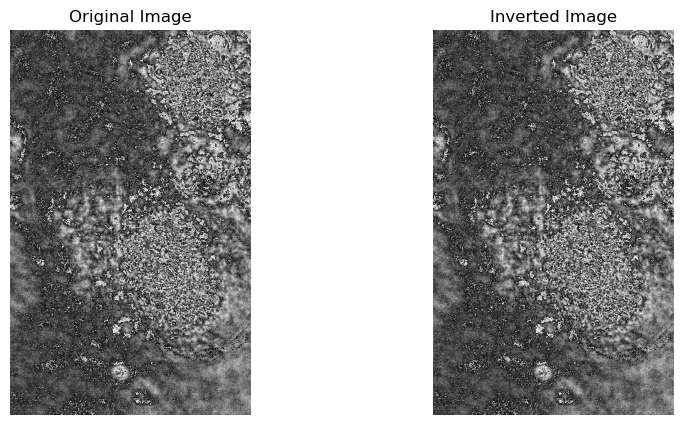

In [4]:
def invert_colors(image):
    
    # Invert the colors
    reimg =  Image.eval(image, (lambda x: 254 - x * 70))
    return reimg
    
def highlight_pixels(image, coordinates):
    # Open the image

    # Create a drawing object
    draw = ImageDraw.Draw(image)

    # Set all pixels at coordinates to white
    for coord in coordinates:
        x, y = coord
        draw.point((x, y), fill="black")

    return image

inverted = invert_colors(im2_cropped)    
coordinates = [(x, y) for x, y in trpos]

result_image = highlight_pixels(inverted, coordinates)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(inverted, cmap="grey")
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap="grey")
plt.title('Inverted Image')
plt.axis('off')

plt.show()

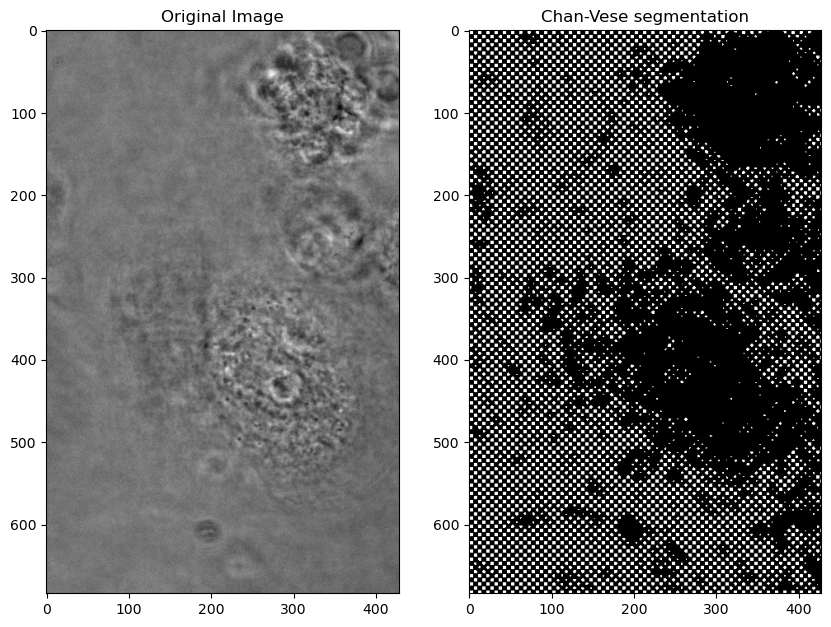

In [5]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.segmentation import chan_vese

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
 
# Sample Image of scikit-image package
#astronaut = data.astronaut()
#gray_astronaut = rgb2gray(astronaut)
brightfield_img = np.array(im2_cropped)
# Computing the Chan VESE segmentation technique
chanvese_gray_brightfield = chan_vese(brightfield_img, 
                                    mu=0.35, 
                                    lambda1=4, 
                                    lambda2=2, 
                                    tol=1e-3, 
                                    max_num_iter=250,
                                    dt=0.1,
                                    init_level_set="checkerboard",
                                    extended_output=False)

ax = axes.flatten()
 
# Plotting the original image
ax[0].imshow(brightfield_img, cmap="gray")
ax[0].set_title("Original Image")
 
# Plotting the segmented image
ax[1].imshow(chanvese_gray_brightfield, cmap="gray")
ax[1].set_title("Chan-Vese segmentation")
 
plt.show()


/tmp/ipykernel_210/1574776982.py:44: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour.collections[0].set_label("Iteration 2")
/tmp/ipykernel_210/1574776982.py:46: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour.collections[0].set_label("Iteration 7")
/tmp/ipykernel_210/1574776982.py:48: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour.collections[0].set_label("Iteration "+ str(num_iter) )


Shape of MGAC Image:  (684, 428)
Shape of thunail:  (3664, 2)
Shape of coordinates:  (56261, 2)


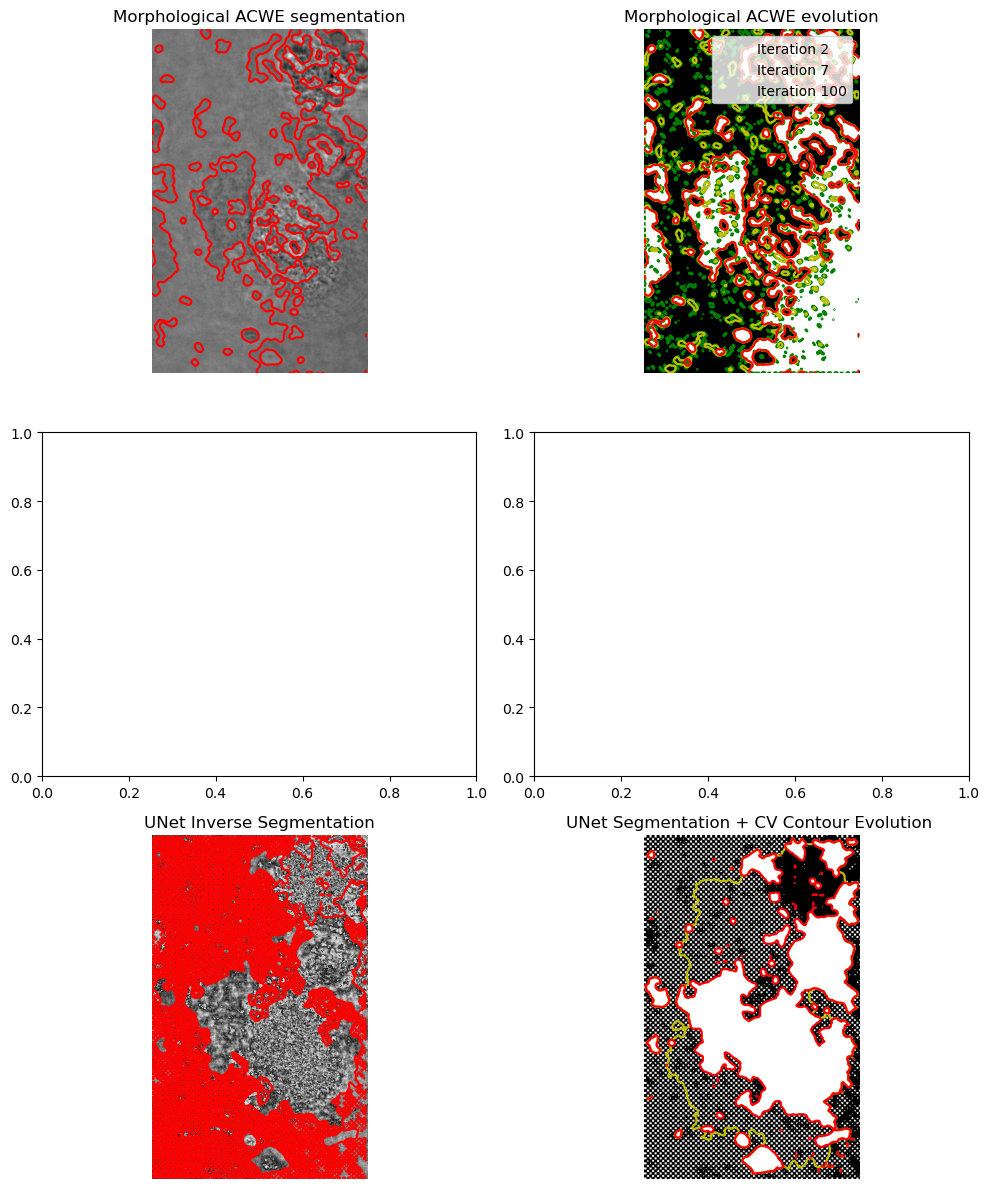

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)


def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
image = img_as_float(np.array(im2_cropped))
#image = img_as_float(chanvese_gray_astronaut)
# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
num_iter = 100
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, num_iter=num_iter, init_level_set=init_ls,
                             smoothing=3, iter_callback=callback)

fig, axes = plt.subplots(3, 2, figsize=(10, 12))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration "+ str(num_iter) )
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)


# # Morphological GAC
# #image = img_as_float(np.array(im2_cropped))
# #image = img_as_float(chanvese_gray_astronaut)
# image = img_as_float(result_image)
# gimage = inverse_gaussian_gradient(image)

# # Initial level set
# init_ls = np.zeros(image.shape, dtype=np.int8)
# init_ls[10:-10, 10:-10] = 1
# # List with intermediate results for plotting the evolution
# evolution = []
# callback = store_evolution_in(evolution)
# ls = morphological_geodesic_active_contour(gimage, num_iter=700,
#                                            init_level_set=init_ls,
#                                            smoothing=3, balloon=-1,
#                                            threshold=0.6,
#                                            iter_callback=callback)

# ax[2].imshow(image, cmap="gray")
# ax[2].set_axis_off()
# ax[2].contour(ls, [0.5], colors='r')
# ax[2].set_title("Morphological GAC segmentation", fontsize=12)

# ax[3].imshow(ls, cmap="gray")
# ax[3].set_axis_off()
# contour = ax[3].contour(evolution[0], [0.5], colors='g')
# contour.collections[0].set_label("Iteration 0")
# contour = ax[3].contour(evolution[100], [0.5], colors='y')
# contour.collections[0].set_label("Iteration 100")
# contour = ax[3].contour(evolution[-1], [0.5], colors='r')
# contour.collections[0].set_label("Iteration 230")
# ax[3].legend(loc="upper right")
# title = "Morphological GAC evolution"
# ax[3].set_title(title, fontsize=12)



#Morphological Chan Vase
image = img_as_float(np.array(inverted))
gimage = inverse_gaussian_gradient(image)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(gimage, num_iter=1500,
                                           init_level_set=init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.801,
                                           iter_callback=callback)

print("Shape of MGAC Image: ", ls.shape)
# print("Values of ls: ", ls)
print("Shape of thunail: ", trpos.shape)

int_brightfield = np.logical_not(chanvese_gray_brightfield).astype(int)
indices = np.where(chanvese_gray_brightfield == 1)
coordinates = np.column_stack(indices[::-1])
print("Shape of coordinates: ", coordinates.shape)

def draw_points_on_image(image, points_array):
    # Create a copy of the image to draw points on
    output_image = np.copy(image)

    # Iterate through each point in the points array
    for point in points_array:
        # Extract x and y coordinates from the points array
        x, y = point

        # Set the pixel at the given coordinates to white (255)
        output_image[int(y),int(x)] = 1  # Assuming the array order is (y, x)
        radius = 0
        # Iterate through a 21x21 square around the point
        for i in range(-radius, radius + 1):
            for j in range(-radius, radius + 1):
                # Calculate the new coordinates
                new_x = x + i
                new_y = y + j

                # Check if the new coordinates are within the image bounds
                if 0 <= new_x < output_image.shape[1] and 0 <= new_y < output_image.shape[0]:
                    # Set the pixel at the new coordinates to white (255)
                    output_image[int(new_y), int(new_x)] = 1
                    
    return output_image

ls = draw_points_on_image(ls, coordinates)

ax[4].imshow(image, cmap="gray")
ax[4].set_axis_off()
ax[4].contour(ls, [0.5], colors='r')
ax[4].set_title("UNet Inverse Segmentation", fontsize=12)

ax[5].imshow(ls, cmap="gray")
ax[5].set_axis_off()
contour = ax[5].contour(evolution[100], [0.5], colors='y')
contour = ax[5].contour(evolution[-1], [0.5], colors='r')
title = "UNet Segmentation + CV Contour Evolution "
ax[5].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()

(500, 428, 3)


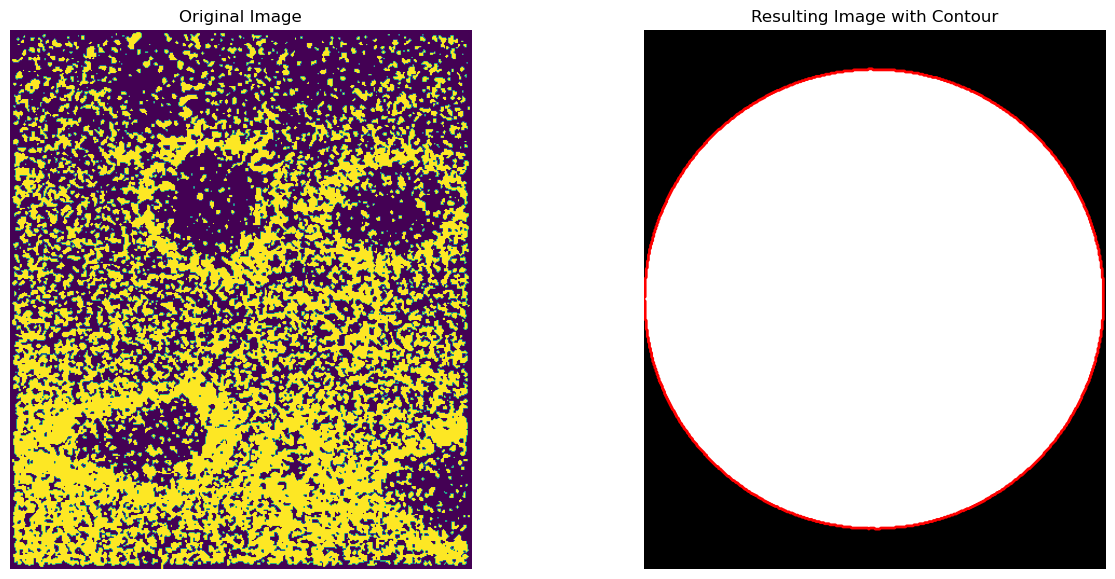

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def grayscale_with_black(image, threshold):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    # Apply thresholding
    _, thresholded_image = cv2.threshold(blurred_image, threshold, 255, cv2.THRESH_BINARY)

    return thresholded_image

# Load the image
image = cv2.imread('./Sugars_Kasumi1_NPL_GSL-1_posXY1_channels_t0_posZ0_thumbnail.png')
print(image[ :, :].shape)
# Set a threshold value (adjust as needed)
threshold_value = 12

# Get the grayscale image with black
# result_image = grayscale_with_black(image, threshold_value)
img = grayscale_with_black(image,threshold_value)
result_image = chan_vese(img, 
                                    mu=0.3, 
                                    lambda1=1, 
                                    lambda2=1, 
                                    tol=1e-3, 
                                    max_num_iter=3000,
                                    dt=0.5,
                                    init_level_set="disk")

# Find contours of the segmentation
contours = find_contours(result_image, 0.5)

# Display the original and resulting images with contours
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title('Resulting Image with Contour')

# Plot the contours
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')

plt.axis('off')

plt.show()


2024-04-29 21:29:32.457538: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 21:29:34.060263: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 21:29:36.262819: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_210/1658031342.py:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=input_shape, inclu

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


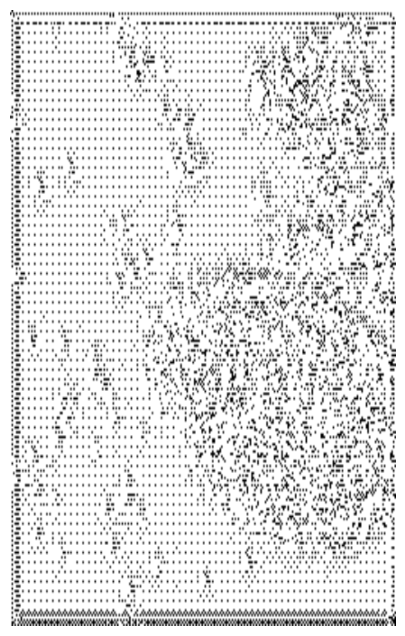

In [8]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.applications import MobileNetV2

# Define the U-Net model architecture
def unet(input_shape=(None, None, 3)):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    layer_names = [
        'block_1_expand_relu',   # 64x64
        'block_3_expand_relu',   # 32x32
        'block_6_expand_relu',   # 16x16
        'block_13_expand_relu',  # 8x8
        'block_16_project',      # 4x4
    ]
    layers = [base_model.get_layer(name).output for name in layer_names]
    down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)
    down_stack.trainable = False

    inputs = Input(shape=input_shape)
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

    for up, skip in zip([512, 256, 128, 64], skips):
        x = Conv2DTranspose(up, (2, 2), strides=2, padding='same')(x)
        concat = concatenate([skip, x])
        x = Conv2D(up, (3, 3), activation='relu', padding='same')(concat)
        x = Conv2D(up, (3, 3), activation='relu', padding='same')(x)

    x = Conv2DTranspose(3, (2, 2), strides=2, padding='same')(x)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Load the pre-trained model with MobileNetV2 weights
model = unet()

# Function to segment the image using the loaded model
def segment_image(image):
    resized_image = cv2.resize(image, (256, 256))  # Resize the image to fit the input shape of the model
    resized_image = np.expand_dims(resized_image, axis=0)  # Add batch dimension
    mask = model.predict(resized_image)[0]  # Predict mask

    # Thresholding the mask
    mask[mask >= 0.5] = 1
    mask[mask < 0.5] = 0

    # Resize the mask to original image size
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    return mask


# Example usage
image_path = BF2  # Path to your input image
input_image = cv2.imread(image_path)
mask = segment_image(input_image)


fig, axes = plt.subplots(1, 1, figsize=(8, 8))
# Display the segmented image using matplotlib
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()


Shape of trpos:  (3664, 2)
            y           x
0  331.228205  114.980342
1  397.764957  254.575214
2  378.947009  269.788889
3  418.406838  298.999145
4  265.719658  302.594872
<class 'numpy.ndarray'>
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[211 682]
[314.61196581 583.93418803]
[0 0]
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
[[1.         0.6028037  0.00467288 ... 1.         1.         1.        ]
 [0.9385965  0.59017867 0.06550253 ... 1.         1.         1.        ]
 [0.5643275  0.5132262  0.43627372 ... 1.         1.         1.        ]
 ...
 [1.         0.6028037  0.00467288 ... 0.56169045 0.22414875 0.        ]
 [1.         0.6028037  0.00467288 ... 0.93421054 0.372807   0.        ]
 [1.         0.6028037  0.00467288 ... 0.9953271  0.39719623 0.        ]]


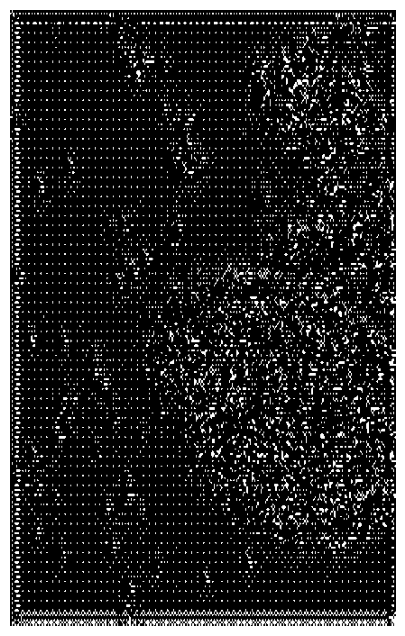

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 1. 1.]]


In [10]:
print("Shape of trpos: ", trpos.shape)

# Creating a pandas DataFrame
df = pd.DataFrame(trpos, columns=['y', 'x'])
# Dividing the values in column 'x' by 100
#df['y'] = df['y'] / 600
# Dividing the values in column 'x' by 100
#df['x'] = df['x'] / 400
# Printing the first few rows of the DataFrame
print(df.head())

print(type(chanvese_gray_brightfield[0]))
int_brightfield = np.logical_not(chanvese_gray_brightfield).astype(int)
print(int_brightfield)
indices = np.where(chanvese_gray_brightfield == 1)
coordinates = np.column_stack(indices[::-1])
print(coordinates[56000])
print(trpos[3500])

print(coordinates[0])





# Convert True/False to 1s and 0s
segmented_image = np.where(chanvese_gray_brightfield, 1, 0)
print(segmented_image)


print(mask)
# Thresholding the image
threshold = 0.3
thresholded_img = np.where(mask >= threshold, 1, 0)



# import matplotlib.pyplot as plt
# from skimage.color import rgb2gray
# from skimage import data
# from skimage.segmentation import chan_vese

# fig, axes = plt.subplots(2, 2, figsize=(10, 10))
 
# # Sample Image of scikit-image package
# #astronaut = data.astronaut()
# #gray_astronaut = rgb2gray(astronaut)
# brightfield_img = np.array(im2_cropped)
# # Computing the Chan VESE segmentation technique
# cv = chan_vese(brightfield_img, 
#                                     mu=0.35, 
#                                     lambda1=4, 
#                                     lambda2=2, 
#                                     tol=1e-3, 
#                                     max_num_iter=1000,
#                                     dt=0.2,
#                                     init_level_set="checkerboard",
#                                     extended_output=True)

# ax = axes.flatten()
 
# # Original image
# ax[0].imshow(image, cmap="gray")
# ax[0].set_axis_off()
# ax[0].set_title("Original Image", fontsize=12)

# # Segmented image
# ax[1].imshow(cv[0], cmap="gray")
# ax[1].set_axis_off()
# title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
# ax[1].set_title(title, fontsize=12)

# # Final level set
# ax[2].imshow(cv[1], cmap="gray")
# ax[2].set_axis_off()
# ax[2].set_title("Final Level Set", fontsize=12)

# # Energy plot
# ax[3].plot(cv[2])
# ax[3].set_title("Evolution of energy over iterations", fontsize=12)

# fig.tight_layout()
# plt.show()

def fix_random_pixels(image, threshold=0.9):
    """
    Fix random black pixels in white shapes by changing them to white.
    
    Parameters:
        image (numpy.ndarray): Input image array.
        threshold (float): Intensity threshold to consider a pixel as white.
    
    Returns:
        numpy.ndarray: Image array with fixed pixels.
    """
    # Copy the image to avoid modifying the original
    fixed_image = np.copy(image)
    
    # Iterate through each pixel
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Check if the pixel is close to white but not exactly white
            if image[i, j] >= threshold:
                fixed_image[i, j] = 0  # Set it to white
            if image[i, j] < 0.5:
                fixed_image[i, j] = 1  # Set it to white
    
    return fixed_image

# Example usage:
# Assuming 'image' is your black and white image stored as a numpy array
# where 0 represents black and 255 represents white
# You can load the image using a library like OpenCV or PIL and convert it to a numpy array
# For demonstration, let's assume 'image' is already loaded

# Fix the random black pixels
fixed_image = fix_random_pixels(mask,0.5)

fig, axes = plt.subplots(1, 1, figsize=(8, 8))
# Display the segmented image using matplotlib
plt.imshow(fixed_image, cmap='gray')
plt.axis('off')
plt.show()

print(fixed_image)